JACK TOPIOL
9180
{'CAS': 94041, 'SEAS': 13944, 'WHAR': 29771, 'NURS': 4671, 'OTHER': 197255, 'UNDEF': 0}
{'CAS': 1989, 'SEAS': 635, 'WHAR': 210, 'NURS': 116, 'OTHER': 2712, 'UNDEF': 0}


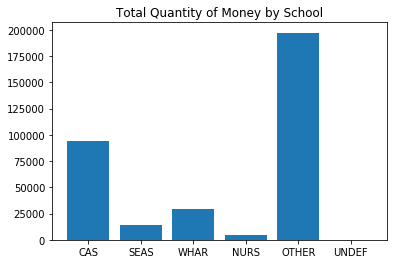

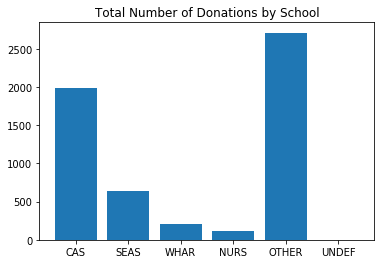

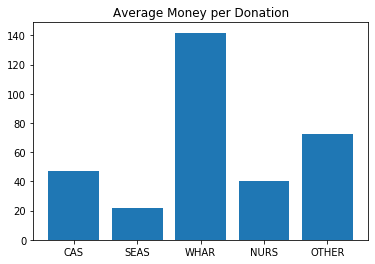

3565
6114
221
186


In [5]:
import pandas
import datetime
import re
import matplotlib.pyplot as plt

import json
from pandas import Series, DataFrame

dft = pandas.read_csv('donations.csv')

# print(dft['contribution_receipt_date'])

counter = 0
dateMap = {}
quantMap = {}

monthlist = []
datelist = []

quantlist = []


for i in range(0, len(dft['contribution_receipt_date'])):
    if (dft['contributor_employer'][i] == "UNIVERSITY OF PENNSYLVANIA" or dft['contributor_employer'][i] == "THE UNIVERSITY OF PENNSYLVANIA"):    
        str = dft["contribution_receipt_date"][i]
        arr = re.split('/ | ', str)
        date = arr[0].split("/")
        month = int(date[0])
        if (month in dateMap):
            dateMap[month] = dateMap[month] + 1
        else:
            dateMap[month] = 1
        
        quantity = int(dft['contribution_receipt_amount'][i])
        
        if (month in quantMap):
            quantMap[month] = quantMap[month] + quantity
        else:
            quantMap[month] = quantity
        counter+=1
#         print(date)

for i in range(1, 13):
    monthlist.append(i)
    datelist.append(dateMap[i])
    quantlist.append(quantMap[i])
    
# plt.plot(monthlist, quantlist)
# plt.ylabel('Quantity of Total Money (USD)')
# plt.xlabel('Months of the Year')
# plt.title('Quantity of money/months in 2019')
# plt.show()

# plt.plot(monthlist, datelist)
# plt.ylabel('Donations')
# plt.xlabel('Months of the Year')
# plt.title('Donations over Months in 2019')
# plt.show()

data = None
depts = None
instructors = set()
no_data_instructors = set()

with open('instructors.json') as f:
    data = json.load(f)

with open('instructors.json') as f:
    depts = json.load(f)

deptnum = len(depts["result"]["values"])
# for i in range(0, deptnum):
#     print(depts["result"]["values"][i]["id"])
casset = set()
seaset = set()
whaset = set()
nurset = set()
oset = set()

with open('cas.txt','r') as file: 
    for line in file:
        casset.add(line.split()[0])
        
with open('wharton.txt','r') as file: 
    for line in file:
        whaset.add(line.split()[0])

with open('seas.txt','r') as file: 
    for line in file:
        seaset.add(line.split()[0])

with open('nurse.txt','r') as file: 
    for line in file:
        nurset.add(line.split()[0])
        
with open('other.txt','r') as file: 
    for line in file:
        item = line.split()[0]
        if (item not in casset and item not in seaset
           and item not in whaset and item not in nurset):
            oset.add(item)
        

        
def mapDept(deptlist):
    for i in range(0, len(deptlist)):
        if (deptlist[i] in casset):
            return "CAS"
        elif (deptlist[i] in seaset):
            return "SEAS"
        elif (deptlist[i] in whaset):
            return "WHAR"
        elif (deptlist[i] in nurset):
            return "NURS"
        elif (deptlist[i] in oset):
            return "OTHER"
    return "UNDEF"
        
        
        
        
        
    
print(data["result"]["values"][0]["name"])
print(len(data["result"]["values"]))
length = len(data["result"]["values"])

instructorMap = {}

for i in range(0, length):
    name = data["result"]["values"][i]["name"]
    name_arr = name.split(" ")
    chars = len(name_arr)
#     print(name_arr[0] + " " + name_arr[chars - 1])
    normalized_name = name_arr[0] + " " + name_arr[chars - 1]
    instructors.add(normalized_name)
    instructorMap[normalized_name] = data["result"]["values"][i]["depts"]

def normalizeName(name):
    name_string = dft['contributor_name'][i]
    name_string = name_string.replace(',', ' ')
    name_arr = name_string.split(' ')
#     print(name_arr)
    if (len(name_arr) == 3):
        return name_arr[2] + " " + name_arr[0]
    else:
        return name_arr[1] + " " + name_arr[0]

deptDonations = {}
deptDonations["CAS"] = 0
deptDonations["SEAS"] = 0
deptDonations["WHAR"] = 0
deptDonations["NURS"] = 0
deptDonations["OTHER"] = 0
deptDonations["UNDEF"] = 0

    
deptDonationsQ = {}
deptDonationsQ["CAS"] = 0
deptDonationsQ["SEAS"] = 0
deptDonationsQ["WHAR"] = 0
deptDonationsQ["NURS"] = 0
deptDonationsQ["OTHER"] = 0
deptDonationsQ["UNDEF"] = 0

profSet = set()

positiveMatch = 0
for i in range(0, len(dft['contribution_receipt_date'])):
    if (dft['contributor_employer'][i] == "UNIVERSITY OF PENNSYLVANIA" or dft['contributor_employer'][i] == "THE UNIVERSITY OF PENNSYLVANIA"):  
        cont_name = dft['contributor_name'][i]
        f_name = dft['contributor_first_name'][i].split(" ")[0]
#         print(f_name)
#         normalized_name = dft['contributor_first_name'][i] + " " + dft['contributor_last_name'][i]
        normalized_name = f_name + " " + dft['contributor_last_name'][i]

        
#         print(normalized_name)
        if (normalized_name in instructors):
            profSet.add(normalized_name)
            dept = mapDept(instructorMap[normalized_name])
            quantity = int(dft['contribution_receipt_amount'][i])
            deptDonations[dept] += quantity
            deptDonationsQ[dept] += 1
            positiveMatch += 1
        else:
            dept = "OTHER"
            quantity = int(dft['contribution_receipt_amount'][i])
            deptDonations[dept] += quantity
            deptDonationsQ[dept] += 1
            no_data_instructors.add(normalized_name)


print(deptDonations)
print(deptDonationsQ)

deptDonationKeys = deptDonations.keys()
deptDonationVals = deptDonations.values()

deptDonationKeysQ = deptDonationsQ.keys()
deptDonationValsQ = deptDonationsQ.values()

deptDonationAvgK = []
deptDonationAvgV = []
for key in deptDonations.keys():
    if key != "UNDEF":
        deptDonationAvgK.append(key)
        deptDonationAvgV.append(deptDonations[key] / deptDonationsQ[key])



plt.bar(deptDonationKeys, deptDonationVals)
plt.title('Total Quantity of Money by School')
plt.show()

plt.bar(deptDonationKeysQ, deptDonationValsQ)
plt.title('Total Number of Donations by School')
plt.show()

plt.bar(deptDonationAvgK, deptDonationAvgV)
plt.title('Average Money per Donation')
plt.show()


print(positiveMatch)
# print(counter)
print(len(dft['contribution_receipt_date']))
print(len(profSet))

# print(dateMap)
print(len(no_data_instructors))

